## Домашнее задание

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

## 1. Загрузка изображения

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [2]:
img = imageio.imread('img.jpg')

In [3]:
print(img.shape)

(1080, 1920, 3)


In [4]:
# Нормирование
img = img.astype(np.float32) / 255.
print(img.shape)

(1080, 1920, 3)


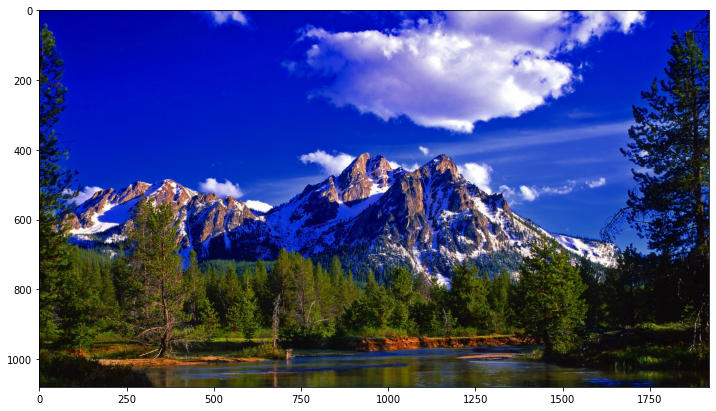

In [5]:
plt.figure(figsize=(12, 12))
plt.imshow(img)

## 2. Цветовая обработка

### 2.1. Нелинейное уменьшение яркости

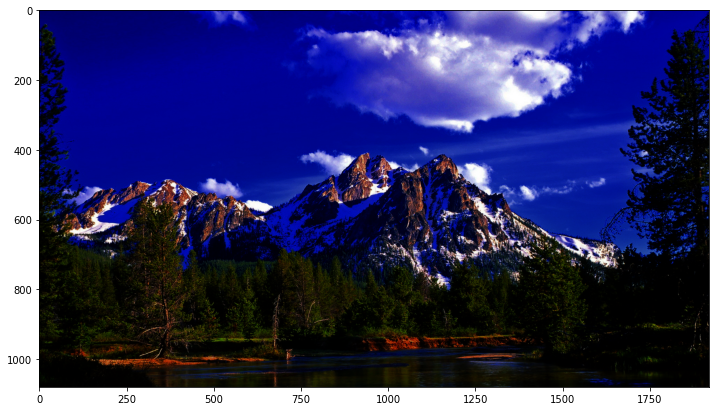

In [15]:
plt.figure(figsize=(12, 12))
plt.imshow(img**2)

### 2.2. Нелинейное увеличение яркости

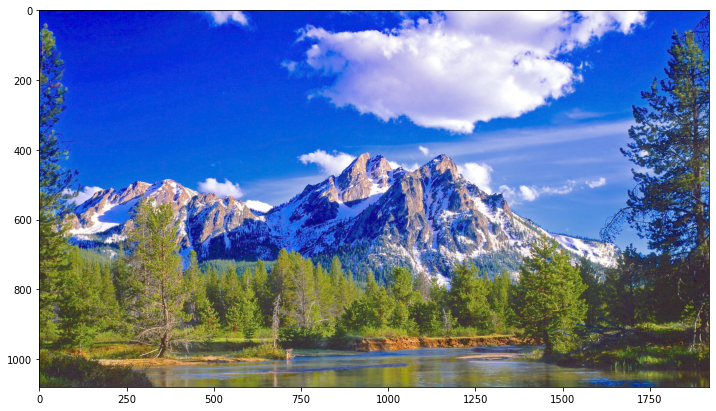

In [16]:
plt.figure(figsize=(12, 12))
plt.imshow(img**0.5)

### 2.3. Получение черно-белого изображения

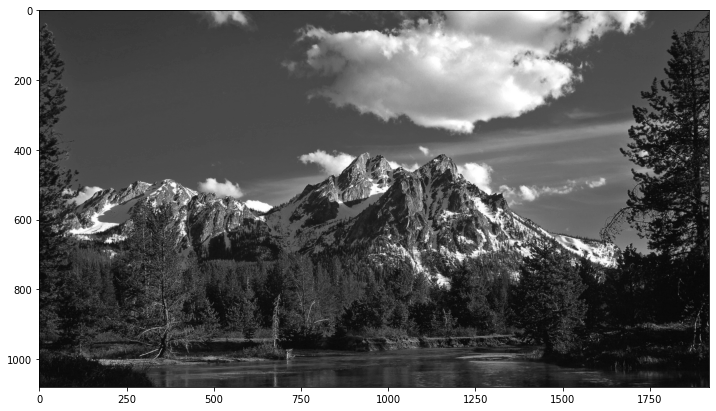

In [18]:
img_bw = np.mean(img, axis=2)
plt.figure(figsize=(12, 12))
plt.imshow(img_bw, cmap='gray')

## 3. Цветовая обработка через перевод в цветовое пространство HSV

### 3.1. Изменение тона

In [7]:
from skimage.color import rgb2hsv, hsv2rgb

In [8]:
img_hsv = rgb2hsv(img)

In [9]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] **= 2
img_hsv_new = hsv2rgb(img_hsv_new)

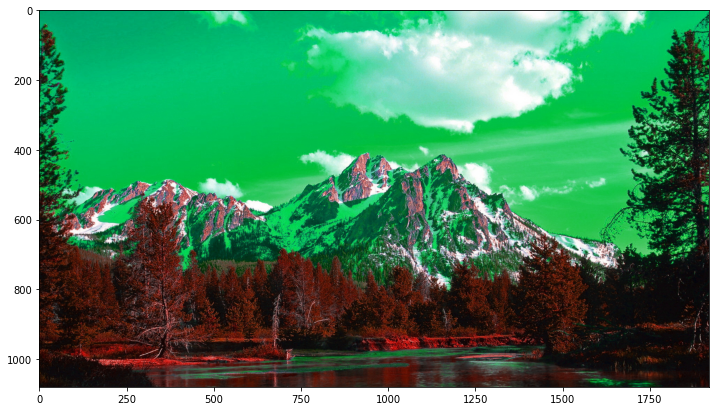

In [10]:
plt.figure(figsize=(12, 12))
plt.imshow(img_hsv_new)

In [11]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] **= 0.5
img_hsv_new = hsv2rgb(img_hsv_new)

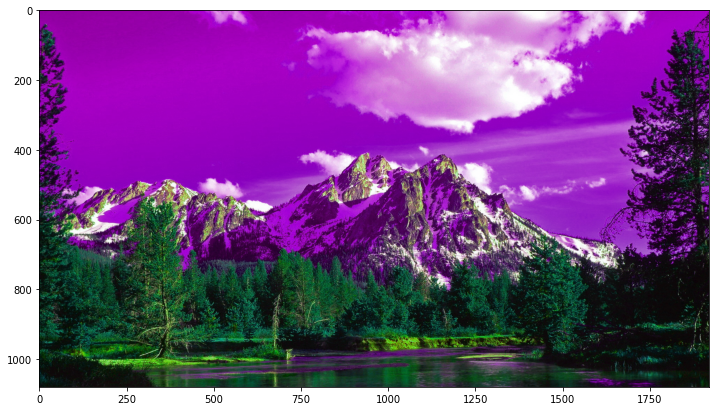

In [12]:
plt.figure(figsize=(12, 12))
plt.imshow(img_hsv_new)

### 3.2. Изменение насыщенности

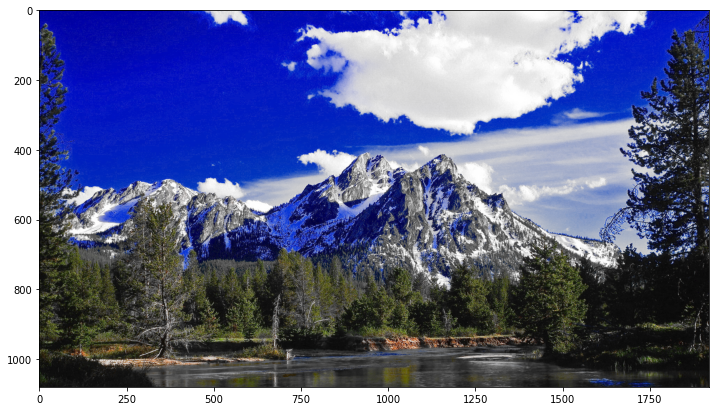

In [13]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] **= 7
img_hsv_new = hsv2rgb(img_hsv_new)
plt.figure(figsize=(12, 12))
plt.imshow(img_hsv_new)

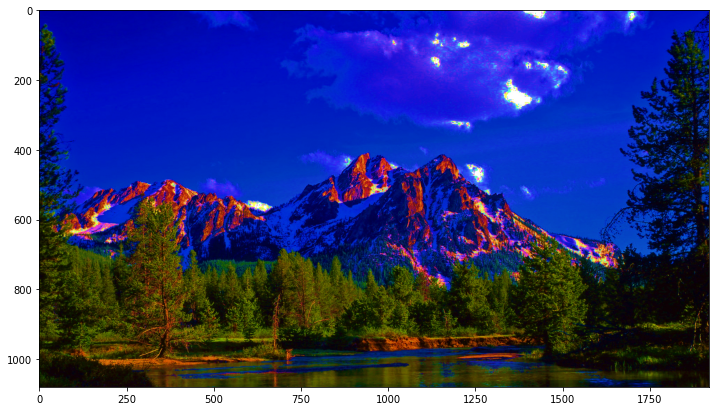

In [15]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] **= 0.1
img_hsv_new = hsv2rgb(img_hsv_new)
plt.figure(figsize=(12, 12))
plt.imshow(img_hsv_new)

### 3.3. Изменение яркости

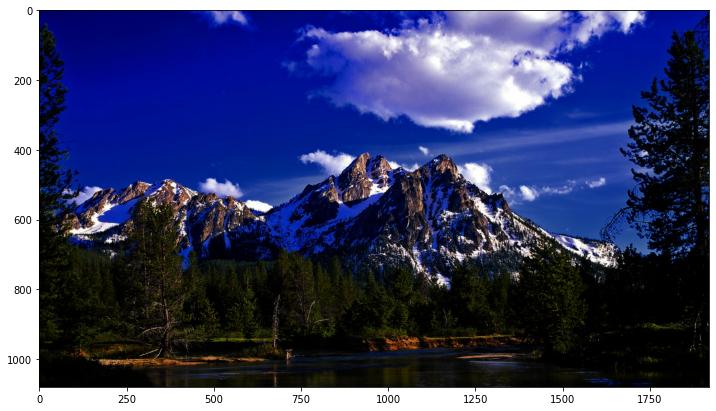

In [17]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 2] **= 2
img_hsv_new = hsv2rgb(img_hsv_new)
plt.figure(figsize=(12, 12))
plt.imshow(img_hsv_new)

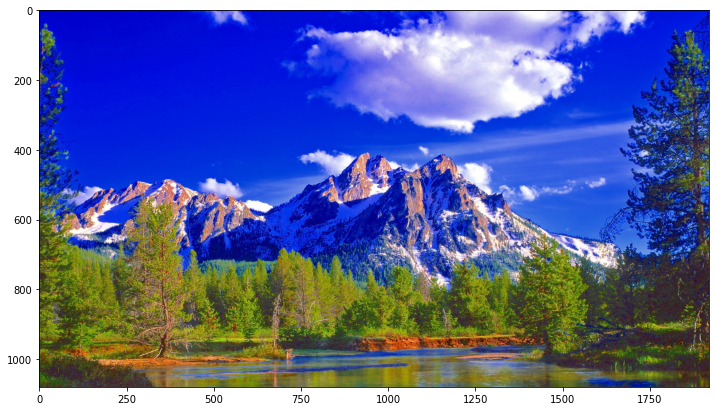

In [18]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 2] **= 0.5
img_hsv_new = hsv2rgb(img_hsv_new)
plt.figure(figsize=(12, 12))
plt.imshow(img_hsv_new)

## 4. Фильтрация

### 4.1. Фильтрация цветного изображения по Гауссу

In [20]:
win_size = (11, 11)
sigma = 3
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                            -(j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

[[0.00125904 0.0020758  0.00306252 0.00404311 0.00477637 0.00504924
  0.00477637 0.00404311 0.00306252 0.0020758  0.00125904]
 [0.0020758  0.00342242 0.00504924 0.00666597 0.00787491 0.00832479
  0.00787491 0.00666597 0.00504924 0.00342242 0.0020758 ]
 [0.00306252 0.00504924 0.00744935 0.00983457 0.01161817 0.01228189
  0.01161817 0.00983457 0.00744935 0.00504924 0.00306252]
 [0.00404311 0.00666597 0.00983457 0.01298353 0.01533823 0.01621447
  0.01533823 0.01298353 0.00983457 0.00666597 0.00404311]
 [0.00477637 0.00787491 0.01161817 0.01533823 0.01811998 0.01915513
  0.01811998 0.01533823 0.01161817 0.00787491 0.00477637]
 [0.00504924 0.00832479 0.01228189 0.01621447 0.01915513 0.02024942
  0.01915513 0.01621447 0.01228189 0.00832479 0.00504924]
 [0.00477637 0.00787491 0.01161817 0.01533823 0.01811998 0.01915513
  0.01811998 0.01533823 0.01161817 0.00787491 0.00477637]
 [0.00404311 0.00666597 0.00983457 0.01298353 0.01533823 0.01621447
  0.01533823 0.01298353 0.00983457 0.00666597 0.00

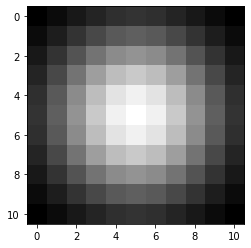

In [21]:
print(w)
plt.imshow(w, cmap='gray')

In [22]:
import scipy.signal

In [24]:
%%time

out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

CPU times: user 2.59 s, sys: 12.8 ms, total: 2.6 s
Wall time: 2.6 s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


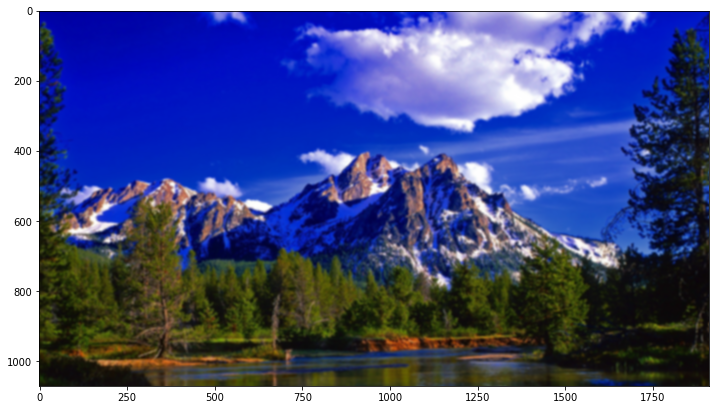

In [25]:
plt.figure(figsize=(12, 12))
plt.imshow(out_img)

### 4.2. Выделение границ

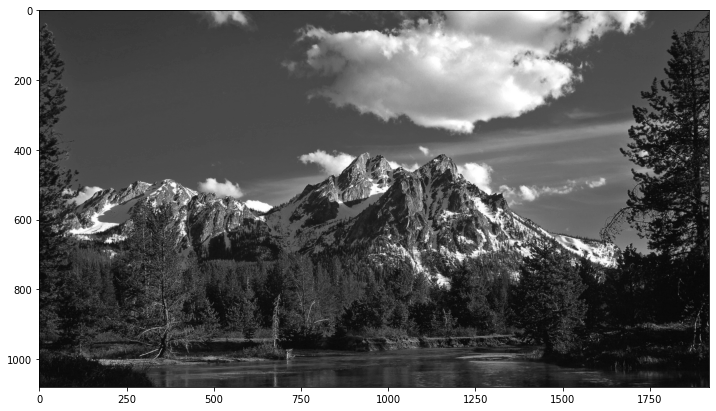

In [26]:
img_bw = np.mean(img, axis=2)
plt.figure(figsize=(12, 12))
plt.imshow(img_bw, cmap='gray')

In [27]:
a = np.array([[-1, -1, -1],
              [0,  0,  0],
              [1,  1,  1]])

b = np.array([[-1, 0, 1],
              [-1, 0, 1],
              [-1, 0, 1]])

In [30]:
out_img = np.abs(scipy.signal.correlate2d(img_bw, a, mode='valid')) + \
np.abs(scipy.signal.correlate2d(img_bw, b, mode='valid'))

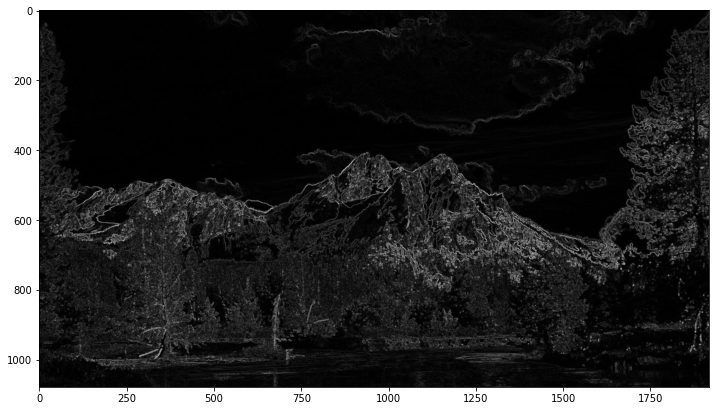

In [32]:
plt.figure(figsize=(12, 12))
plt.imshow(np.abs(out_img), cmap='gray')